-------------------------------------
### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

-------------------------------------
## 2. Importing Data

In [3]:
df = pd.read_csv('../dataset/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

---------------------------------------------
## 3. Data Preprocessing


----------------------------------
### 3.1 Missing value treatment

In [5]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

----------------------------------
### 3.2 Handling data types

In [6]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

---------------------------
# splitting the data in to X & Y  base model before outlier treatment

In [7]:
#splitting the data in to X & Y 
x1=df.drop('concrete_compressive_strength', axis=1)
x1.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [8]:
y1=df['concrete_compressive_strength']
y1.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1train.shape,x1test.shape,y1train.shape,y1test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on base model before outlier treatment

In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x1train,y1train)

LinearRegression()

---------------------------------------
#### R square,Adjusted R square

In [28]:
lin_r2_1 = lr.score(x1train,y1train)
print("R square:- ",lin_r2_1)

lin_ar2_1 = 1-((1-lin_r2_1)*(80-1))/(80-9-1)
print("Adjusted R square:- ",lin_ar2_1)
from sklearn import metrics
p1 = lr.predict(x1test)
lin_mse_1 = metrics.mean_squared_error(y1test,p1)
# print("Lin Reg mse :- ",lin_mse_1)

rmse_1 = np.sqrt(lin_mse_1)
print("Lin Reg rmse:- ",rmse_1)

R square:-  0.6157531749147256
Adjusted R square:-  0.566350011689476
Lin Reg rmse:-  11.140642569403994


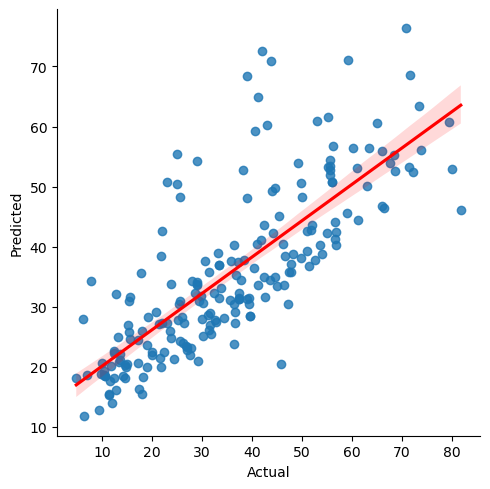

In [17]:
lin_df_1=pd.DataFrame({"Actual":y1test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

--------------------------
## XGB Regressor

In [24]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x1train,y1train)
xgbr_p_1 = xgbr.predict(x1test)
xgbr_base_r1 = xgbr.score(x1train,y1train)
print("R square:", xgbr_base_r1)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
xgbr_base_ar1 = 1 - ((1 - xgbr_base_r1) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_base_ar1)
from sklearn import metrics
xgbr_base_mse = metrics.mean_squared_error(y1test,xgbr_p_1)
# print("mse:", xgbr_base_mse)
xgbr_base_rmse_1 = np.sqrt(xgbr_base_mse)
print("XGBR rmse:- ",xgbr_base_rmse_1)

R square: 0.9238144025487851
Adjusted R square: 0.9230665684633744
XGBR rmse:-  6.316848714303042


--------------------------
## RF-Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x1train,y1train)
rfr_p_1 = rfr.predict(x1test)
rfr_base_r1 = rfr.score(x1train,y1train)
print("R square:", rfr_base_r1)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
rfr_base_ar1 = 1 - ((1 - rfr_base_r1) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_base_ar1)
from sklearn import metrics
rfr_base_mse1 = metrics.mean_squared_error(y1test,rfr_p_1)
# print("mse:", rfr_base_mse)
rfr_base_rmse_1 = np.sqrt(rfr_base_mse1)
print("rfr rmse:- ",rfr_base_rmse_1)

R square: 0.9873318962377875
Adjusted R square: 0.987207546753005
rfr rmse:-  5.35187625020747


# Comparision of Base model

In [ ]:
list1=['linear','Lasso','Ridge','RFR','XGBR']
list2=[lin_base_r1,las_base_r1,rid_base_r1,rfr_base_r1,xgbr_base_r1]
list3=[lin_base_ar1,las_base_ar1,rid_base_ar1,rfr_base_ar1,xgbr_base_ar1]
list4=[lin_base_mse,las_base_mse,rid_base_mse,rfr_base_mse,xgbr_base_mse]